# **Data clean**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\IT PARK\AppData\Local\Temp\ipykernel_11444\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv(r"E:\Python\MachineLearniing\LinearRegresson\student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Outlier will check for only feature not for target variables.

In [8]:
# Checing the Outlier for hours column
q3=df.Hours.quantile(0.75)
q1=df.Hours.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
upper_threshold,lower_threshold

(14.450000000000001, -4.3500000000000005)

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(25, 2)

# **EDA**

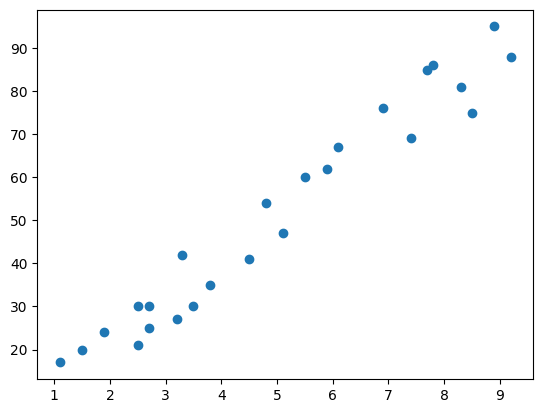

In [11]:
plt.scatter(x=df['Hours'],y=df['Scores'])

<Axes: xlabel='Hours', ylabel='Scores'>

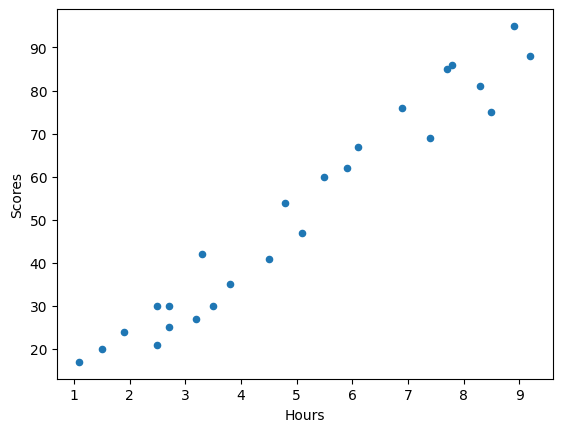

In [12]:
df.plot.scatter(x='Hours',y='Scores')

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Is there any relation between feature and target----->yes** 
**Is there any linear relationship between feature and target----->yes**
Linear Relationship-->yes
Transformation--->no

# **Encode**

In [14]:
#there is no catogary data so no encode required

# **Split**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=df.loc[:,['Hours']]
y=df['Scores']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X.shape,x_train.shape

((25, 1), (20, 1))

# **Scale**

In [19]:
#not madatory for the Linear regression

# **Model**

In [20]:
from sklearn.linear_model import LinearRegression #class
lr_model=LinearRegression()  #object
lr_model.fit(x_train,y_train)

LinearRegression()

In [21]:
lr_model.coef_,lr_model.intercept_

(array([9.68207815]), 2.826892353899737)

In [24]:
#y=mx+c
predcted_score=9.68*6+2.82
predcted_score

60.9

In [22]:
lr_model.predict([[6]])

e:\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.91936128])

In [26]:
pd.DataFrame(zip(lr_model.predict(x_test),y_test))

,0,1
0,83.188141,81
1,27.032088,30
2,27.032088,21
3,69.633232,76
4,59.951153,62


# **Evaluation**

In [28]:
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.9678055545167994

In [29]:
# perils of extrapolation
# Max_hours study is 9.1 hours if put more than then it is perils of extrapolation
lr_model.predict([[12]])

e:\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([119.01183021])